In [27]:
# Seção 1: Importação de bibliotecas
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")

In [28]:
df = pd.read_csv("../data/ecommerce_data_preprocessed.csv")

# Conversão de data
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489060 entries, 0 to 489059
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   event_date                489060 non-null  datetime64[ns]
 1   event_name                489060 non-null  object        
 2   user_pseudo_id            489060 non-null  float64       
 3   event_bundle_sequence_id  489060 non-null  int64         
 4   event_timestamp           489060 non-null  int64         
 5   country                   489060 non-null  object        
 6   traffic_source            489060 non-null  object        
 7   device_category           489060 non-null  object        
 8   total_item_quantity       91682 non-null   float64       
 9   purchase_revenue_in_usd   5692 non-null    float64       
 10  session_id                489060 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usag

In [29]:
# Verificação de valores ausentes
missing = df.isnull().sum()
print("Valores ausentes:\n", missing)

Valores ausentes:
 event_date                       0
event_name                       0
user_pseudo_id                   0
event_bundle_sequence_id         0
event_timestamp                  0
country                          0
traffic_source                   0
device_category                  0
total_item_quantity         397378
purchase_revenue_in_usd     483368
session_id                       0
dtype: int64


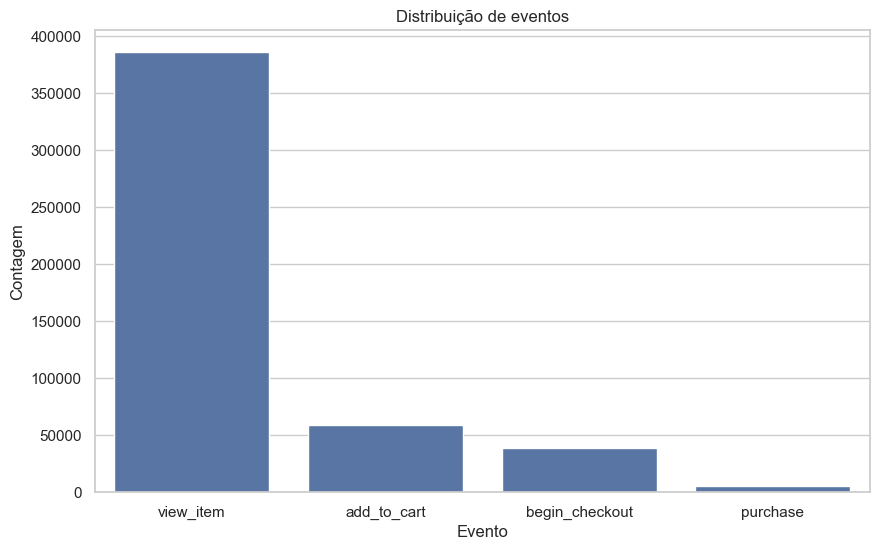

In [30]:
# Visualização da distribuição de eventos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='event_name', order=df['event_name'].value_counts().index)
plt.title('Distribuição de eventos')
plt.xlabel('Evento')
plt.ylabel('Contagem')
plt.show()

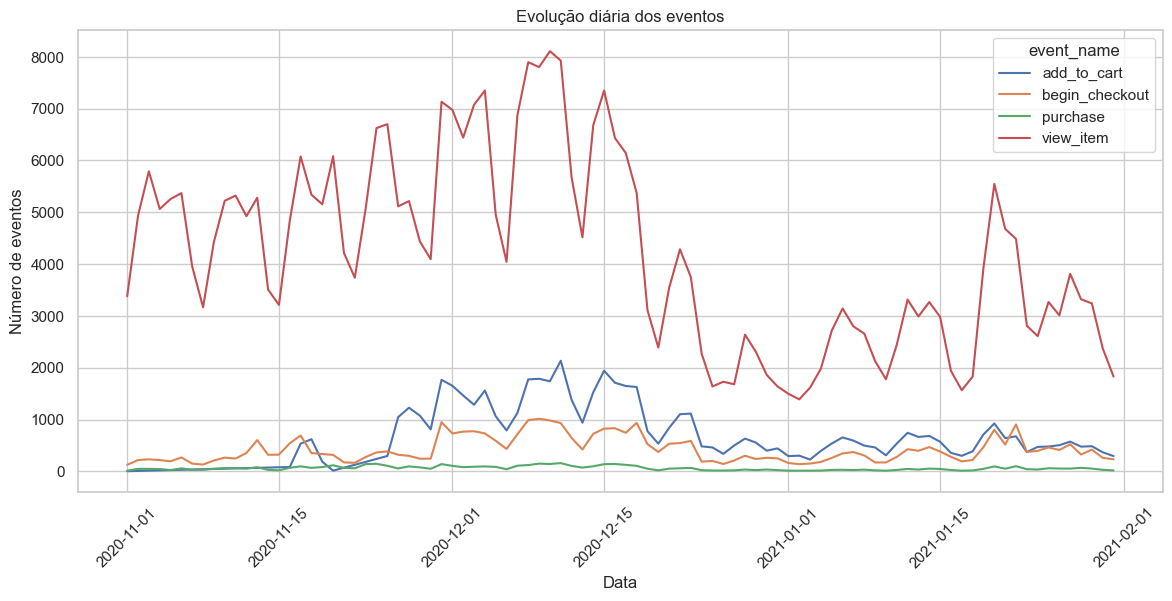

In [31]:
# Seção 5: Análise temporal de eventos
df_eventos = df.groupby(['event_date', 'event_name']).size().reset_index(name='count')
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_eventos, x='event_date', y='count', hue='event_name')
plt.title('Evolução diária dos eventos')
plt.xlabel('Data')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.show()

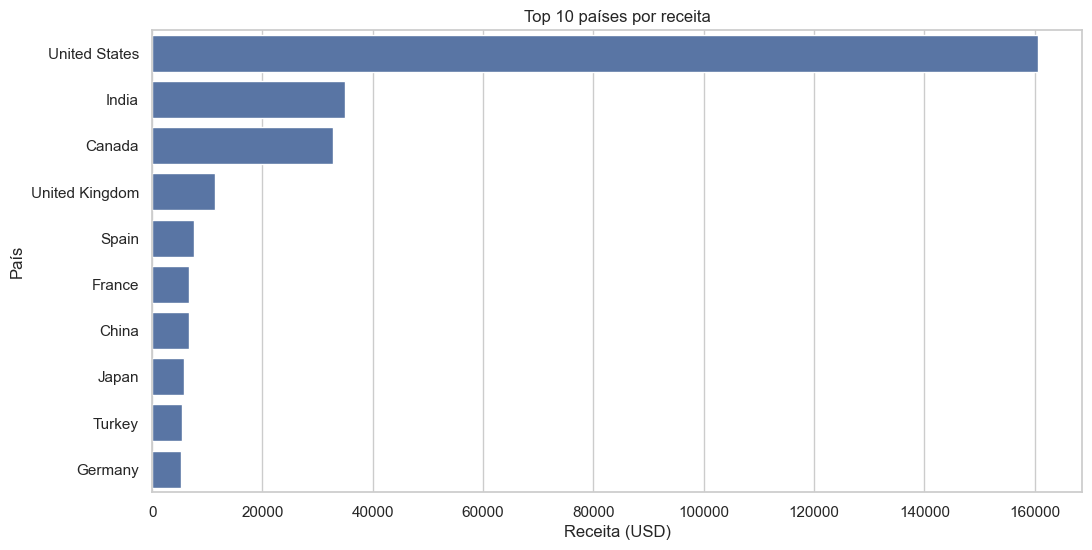

In [32]:
# Seção 6: Receita total por país
df_purchase = df[df['event_name'] == 'purchase']
df_receita_pais = df_purchase.groupby('country')['purchase_revenue_in_usd'].sum().reset_index()
df_receita_pais = df_receita_pais.sort_values(by='purchase_revenue_in_usd', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_receita_pais, x='purchase_revenue_in_usd', y='country')
plt.title('Top 10 países por receita')
plt.xlabel('Receita (USD)')
plt.ylabel('País')
plt.show()

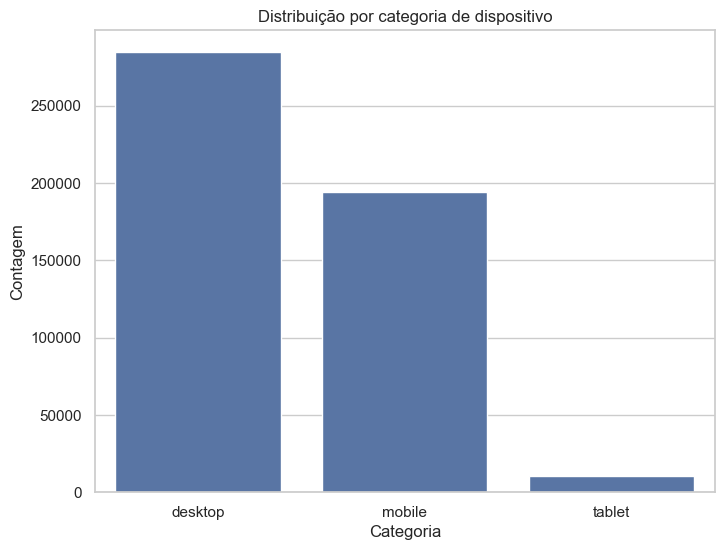

In [33]:
# Seção 7: Dispositivos mais usados
df_device = df['device_category'].value_counts().reset_index()
df_device.columns = ['device_category', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(data=df_device, x='device_category', y='count')
plt.title('Distribuição por categoria de dispositivo')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

In [34]:
df.head()

,event_date,event_name,user_pseudo_id,event_bundle_sequence_id,event_timestamp,country,traffic_source,device_category,total_item_quantity,purchase_revenue_in_usd,session_id
0,2020-12-12,view_item,1.000534e+07,1310322062,1607758725633282,China,google,desktop,NaN,NaN,10005335.8064658740_2020-12-12_1310322062
1,2020-12-14,view_item,1.000534e+07,4271453581,1607921485078277,China,google,desktop,NaN,NaN,10005335.8064658740_2020-12-14_4271453581
2,2020-12-14,view_item,1.000534e+07,-3237753846,1607921498213071,China,google,desktop,NaN,NaN,10005335.8064658740_2020-12-14_-3237753846
3,2020-11-06,view_item,1.000631e+06,-76321058,1604674751446757,(not set),<Other>,mobile,NaN,NaN,1000631.1195930056_2020-11-06_-76321058
4,2020-11-06,view_item,1.000631e+06,8567039887,1604674795482253,(not set),<Other>,mobile,NaN,NaN,1000631.1195930056_2020-11-06_8567039887


In [35]:
df.event_name.value_counts()

event_name
view_item         386068
add_to_cart        58543
begin_checkout     38757
purchase            5692
Name: count, dtype: int64

In [36]:
n_compradores = df[df['event_name']=="purchase"]['user_pseudo_id'].nunique()
n_visitantes = df['user_pseudo_id'].nunique()

tx_conversao = (n_compradores/n_visitantes) * 100

print(f'Taxa de conversão = {tx_conversao:.2f} %')

Taxa de conversão = 7.20 %


<Axes: xlabel='month'>

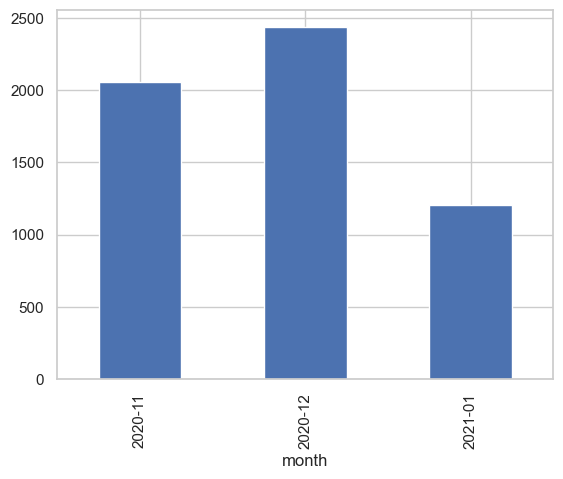

In [40]:
df['month'] = df['event_date'].dt.to_period('M')
compras = df[df['event_name'] == 'purchase']
compras_por_mes = compras.groupby(['user_pseudo_id', 'month']).size().reset_index(name='compras')

compras_por_mes.groupby('month')['compras'].sum().plot(kind='bar')